# Скачиваем документы

In [619]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [620]:
data = pd.read_csv("universities_final_data.csv", encoding='cp437')
del data['url'],data['location'], data['country_name'], data['iso2_code'], data['iso3_code'], data['heritage_year']

Удалям признаки: ..., так как

In [621]:
data

,name,country,qs_ranking_preview,the_ranking_preview,arwu_ranking_preview,bachelor_from,bachelor_to,master_from,master_to,doctorate_from,...,female_students,acceptance_rate,qs_rating,the_rating,rating_usa,gdp,unemployment_rate,school_enrollment_tert,adult_literacy_rate,economic_freedom_score
0,Harvard University,US,4.0,3.0,1.0,"7,918","60,144","7,748","78,067","11,128",...,50%,3%,#4,#3,#1,2.918489e+13,4.106,79.361931,NaN,70.2
1,Massachusetts Institute of Technology,US,1.0,2.0,3.0,"61,990","61,990","61,990","144,000","61,990",...,40%,4%,#1,#2,#3,2.918489e+13,4.106,79.361931,NaN,70.2
2,Stanford University,US,6.0,6.0,2.0,"43,406","58,400","26,473","143,106","25,433",...,46%,4%,#6,#6,#2,2.918489e+13,4.106,79.361931,NaN,70.2
3,University of Cambridge,GB,5.0,5.0,4.0,"30,895","44,584","10,910","70,626","13,053",...,47%,12%,#5,#5,NaN,3.643834e+12,4.111,80.498772,NaN,69.3
4,California Institute of Technology,US,10.0,7.0,9.0,"56,364","60,816","54,570","60,816","54,570",...,36%,3%,#10,#7,#19,2.918489e+13,4.106,79.361931,NaN,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Stillman College,US,NaN,NaN,NaN,"11,389","11,389","12,497","12,497",NaN,...,NaN,65%,NaN,NaN,NaN,2.918489e+13,4.106,79.361931,NaN,70.2
9996,IMT Alti Studi Lucca,IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.372775e+12,6.778,75.949654,99.349998,60.9
9997,National Academy of Santa Cecilia,IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.372775e+12,6.778,75.949654,99.349998,60.9
9998,Dayananda Sagar College of Engineering,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.912686e+12,4.202,34.418466,81.699997,53.0


# Удаляем дубликаты

In [622]:
print(f"Изначально: {len(data)}")

Изначально: 10000


In [623]:
data_no_full_dupes = data.drop_duplicates()
rows1 = data_no_full_dupes.shape[0]
print(f"После удаления полных дублей: {rows1}")

После удаления полных дублей: 10000


Дубликаты не нашлись, так что ничего удалять не надо


# Начинаем работать с пропусками

Есть ли пропущенные значения? Сколько? Какова их доля от общего числа объектов для каждого конкретного признака? И, в целом, насколько ваш датасет “разрежен” в контексте пропущенных значений? Выдвинуть и (желательно) проверить гипотезу, что могут означать пропущенные значения? Осмысленно и аргументированно обработать пропуски.

In [624]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    10000 non-null  object 
 1   country                 9981 non-null   object 
 2   qs_ranking_preview      1371 non-null   float64
 3   the_ranking_preview     1320 non-null   float64
 4   arwu_ranking_preview    895 non-null    float64
 5   bachelor_from           4417 non-null   object 
 6   bachelor_to             4417 non-null   object 
 7   master_from             4065 non-null   object 
 8   master_to               4065 non-null   object 
 9   doctorate_from          461 non-null    object 
 10  doctorate_to            461 non-null    object 
 11  location_full           9986 non-null   object 
 12  establishment_year      7858 non-null   float64
 13  total_students          5573 non-null   object 
 14  international_students  2129 non-null  

In [625]:
missing_count = data.isnull().sum()
missing_percent = (missing_count / len(data)) * 100

data_missing = pd.DataFrame({
    'Количество пропусков': missing_count.values,
    'Доля (%)': missing_percent.round(2)
}).sort_values(by='Количество пропусков', ascending=False)

display(data_missing)

,Количество пропусков,Доля (%)
rating_usa,9833,98.33
doctorate_from,9539,95.39
doctorate_to,9539,95.39
arwu_ranking_preview,9105,91.05
the_rating,8984,89.84
qs_rating,8947,89.47
the_ranking_preview,8680,86.80
qs_ranking_preview,8629,86.29
female_students,8376,83.76
international_students,7871,78.71


In [626]:
total_missing = data.isnull().sum().sum()
total_cells = data.shape[0] * data.shape[1]
sparsity = total_missing / total_cells * 100
print(f"Общая разреженность: {sparsity:.2f}%")

Общая разреженность: 52.94%


Гипотезы:

# 1. убрали пропуск по стране

In [627]:
data[data["country"].isna()]

,name,country,qs_ranking_preview,the_ranking_preview,arwu_ranking_preview,bachelor_from,bachelor_to,master_from,master_to,doctorate_from,...,female_students,acceptance_rate,qs_rating,the_rating,rating_usa,gdp,unemployment_rate,school_enrollment_tert,adult_literacy_rate,economic_freedom_score
767,Vasyl' Stus Donetsk National University,NaN,NaN,NaN,NaN,"2,500","2,500","2,500","2,500",NaN,...,NaN,50%,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
1603,Polytechnic of Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
1772,Eastern Mediterranean University,NaN,611.0,601.0,NaN,"2,506","22,858",500,"5,389",NaN,...,42%,NaN,#616,#701,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
2844,University of Luhansk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
4192,Kherson State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
4655,Near East University,NaN,NaN,601.0,NaN,NaN,NaN,NaN,NaN,NaN,...,44%,NaN,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
5188,Mariupol State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
5792,Girne American University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
6766,East Ukrainian Volodymyr Dahl National University,NaN,NaN,NaN,NaN,"5,000","5,000","5,000","5,000",NaN,...,NaN,40%,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
6926,Donetsk National Technical University,NaN,NaN,NaN,NaN,"2,500","2,500","2,500","2,500",NaN,...,NaN,60%,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7


In [628]:
data.loc[data["country"].isna(), "country"] = "Namibia"

# 2. удалили строки с пропусками по целевой переменной

In [629]:
data=data.dropna(subset=['qs_ranking_preview'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1371 entries, 0 to 9505
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1371 non-null   object 
 1   country                 1371 non-null   object 
 2   qs_ranking_preview      1371 non-null   float64
 3   the_ranking_preview     898 non-null    float64
 4   arwu_ranking_preview    689 non-null    float64
 5   bachelor_from           1153 non-null   object 
 6   bachelor_to             1153 non-null   object 
 7   master_from             1154 non-null   object 
 8   master_to               1154 non-null   object 
 9   doctorate_from          335 non-null    object 
 10  doctorate_to            335 non-null    object 
 11  location_full           1371 non-null   object 
 12  establishment_year      1324 non-null   float64
 13  total_students          1295 non-null   object 
 14  international_students  1246 non-null   objec

# 3. удалили лишние признаки

Удаляем также след признаки, так как ...

In [630]:
del data['the_ranking_preview'], data['the_rating'], data['arwu_ranking_preview'], data['rating_usa'], data['qs_rating'], data['doctorate_from'], data['doctorate_to']

In [631]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1371 entries, 0 to 9505
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1371 non-null   object 
 1   country                 1371 non-null   object 
 2   qs_ranking_preview      1371 non-null   float64
 3   bachelor_from           1153 non-null   object 
 4   bachelor_to             1153 non-null   object 
 5   master_from             1154 non-null   object 
 6   master_to               1154 non-null   object 
 7   location_full           1371 non-null   object 
 8   establishment_year      1324 non-null   float64
 9   total_students          1295 non-null   object 
 10  international_students  1246 non-null   object 
 11  female_students         948 non-null    object 
 12  acceptance_rate         560 non-null    object 
 13  gdp                     1327 non-null   float64
 14  unemployment_rate       1327 non-null   float

# 4. думаем, что делать с acceptance rate

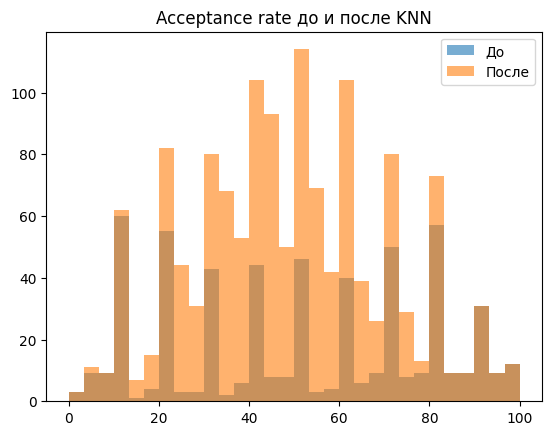

In [632]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# переводим acceptance_rate в число
data.loc[:, "acceptance_rate"] = (
    data["acceptance_rate"].astype(str)
    .str.replace("%", "")
    .str.replace(",", "")
    .astype(float)
)

data = data.sort_values("qs_ranking_preview").reset_index(drop=True)

# кодируем страны числом (т.к. KNN не работает с текстом)
data["country_encoded"] = LabelEncoder().fit_transform(data["country"].astype(str))

# KNN для заполнения пропусков
imputer = KNNImputer(n_neighbors=5)
data["acceptance_rate_filled"] = imputer.fit_transform(
    data[["qs_ranking_preview", "country_encoded", "acceptance_rate"]]
)[:, 2]# берём заполненные значения acceptance_rate, т.е. 3 столбца

plt.hist(data["acceptance_rate"].dropna(), bins=30, alpha=0.6, label="До")
plt.hist(data["acceptance_rate_filled"], bins=30, alpha=0.6, label="После")
plt.legend(); plt.title("Acceptance rate до и после KNN"); plt.show()




In [633]:
print(data.columns.tolist())

['name', 'country', 'qs_ranking_preview', 'bachelor_from', 'bachelor_to', 'master_from', 'master_to', 'location_full', 'establishment_year', 'total_students', 'international_students', 'female_students', 'acceptance_rate', 'gdp', 'unemployment_rate', 'school_enrollment_tert', 'adult_literacy_rate', 'economic_freedom_score', 'country_encoded', 'acceptance_rate_filled']


In [634]:
del data['acceptance_rate_filled'], data['country_encoded']

In [635]:
print(data.columns.tolist())

['name', 'country', 'qs_ranking_preview', 'bachelor_from', 'bachelor_to', 'master_from', 'master_to', 'location_full', 'establishment_year', 'total_students', 'international_students', 'female_students', 'acceptance_rate', 'gdp', 'unemployment_rate', 'school_enrollment_tert', 'adult_literacy_rate', 'economic_freedom_score']


In [636]:
data["acceptance_rate"] = data["acceptance_rate"].fillna("Nan")

**!!!!Тут обосновать !!!!!!**



# 5. что получается до FE

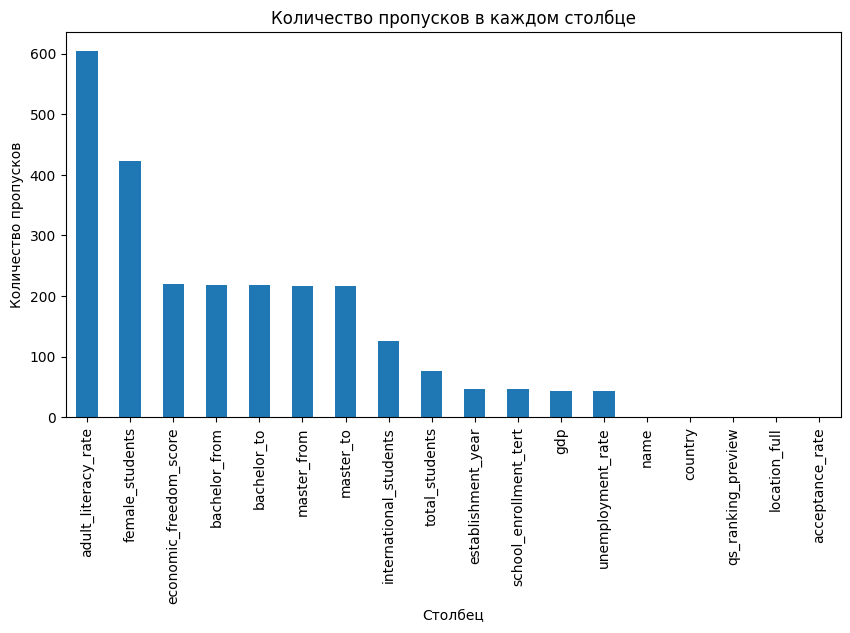

In [637]:
missing = data.isnull().sum().sort_values(ascending=False)

missing.plot(kind='bar', figsize=(10, 5))
plt.title("Количество пропусков в каждом столбце")
plt.xlabel("Столбец")
plt.ylabel("Количество пропусков")
plt.show()

In [638]:
missing_count = data.isnull().sum()
missing_percent = (missing_count / len(data)) * 100

data_missing = pd.DataFrame({
    'Количество пропусков': missing_count.values,
    'Доля (%)': missing_percent.round(2)
}).sort_values(by='Количество пропусков', ascending=False)

display(data_missing)

,Количество пропусков,Доля (%)
adult_literacy_rate,605,44.13
female_students,423,30.85
economic_freedom_score,219,15.97
bachelor_from,218,15.90
bachelor_to,218,15.90
master_from,217,15.83
master_to,217,15.83
international_students,125,9.12
total_students,76,5.54
establishment_year,47,3.43


In [639]:
total_missing = data.isnull().sum().sum()
total_cells = data.shape[0] * data.shape[1]
sparsity = total_missing / total_cells * 100
print(f"Общая разреженность: {sparsity:.2f}%")

Общая разреженность: 10.13%


# FE - заполняем пропуски на основе нового признака из старого и объединение признаков

добавим столбец - континент к нашим странам, чтоб сгруппировать по ним и дополнить столбец - грамотность

In [640]:
!pip install pycountry-convert

In [641]:
import pycountry_convert as pc

continent_map = {
    'AF': 'Africa',
    'AN': 'Antarctica',
    'AS': 'Asia',
    'EU': 'Europe',
    'NA': 'North America',
    'OC': 'Australia',
    'SA': 'South America'
}

def get_continent(country):
    try:
        code = pc.country_alpha2_to_continent_code(country)
        return continent_map.get(code)
    except:
        return None

data["continent"] = data["country"].apply(get_continent)

print(data[["country", "continent"]].head())

  country      continent
0      US  North America
1      GB         Europe
2      GB         Europe
3      US  North America
4      GB         Europe


In [642]:
missing = data[data["continent"].isna()]
missing

,name,country,qs_ranking_preview,bachelor_from,bachelor_to,master_from,master_to,location_full,establishment_year,total_students,international_students,female_students,acceptance_rate,gdp,unemployment_rate,school_enrollment_tert,adult_literacy_rate,economic_freedom_score,continent
572,Eastern Mediterranean University,Namibia,611.0,"2,506","22,858",500,"5,389",Northern Cyprus,NaN,"16,073","13,249",42%,Nan,1.337235e+10,19.148,26.109265,87.639999,58.7,None


дополним сами одну страну

In [643]:
data.loc[data["country"] == "Namibia", "continent"] = "Africa"

In [644]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1371 non-null   object 
 1   country                 1371 non-null   object 
 2   qs_ranking_preview      1371 non-null   float64
 3   bachelor_from           1153 non-null   object 
 4   bachelor_to             1153 non-null   object 
 5   master_from             1154 non-null   object 
 6   master_to               1154 non-null   object 
 7   location_full           1371 non-null   object 
 8   establishment_year      1324 non-null   float64
 9   total_students          1295 non-null   object 
 10  international_students  1246 non-null   object 
 11  female_students         948 non-null    object 
 12  acceptance_rate         1371 non-null   object 
 13  gdp                     1327 non-null   float64
 14  unemployment_rate       1327 non-null   

In [645]:
continent_means = data.groupby("continent")["adult_literacy_rate"].mean()

data["adult_literacy_rate"] = data.apply(
    lambda row: continent_means[row["continent"]] if pd.isna(row["adult_literacy_rate"]) else row["adult_literacy_rate"],
    axis=1
)

In [646]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1371 non-null   object 
 1   country                 1371 non-null   object 
 2   qs_ranking_preview      1371 non-null   float64
 3   bachelor_from           1153 non-null   object 
 4   bachelor_to             1153 non-null   object 
 5   master_from             1154 non-null   object 
 6   master_to               1154 non-null   object 
 7   location_full           1371 non-null   object 
 8   establishment_year      1324 non-null   float64
 9   total_students          1295 non-null   object 
 10  international_students  1246 non-null   object 
 11  female_students         948 non-null    object 
 12  acceptance_rate         1371 non-null   object 
 13  gdp                     1327 non-null   float64
 14  unemployment_rate       1327 non-null   

In [647]:
missing_literacy = data[data["adult_literacy_rate"].isna()]

print(f"Количество строк без adult_literacy_rate: {len(missing_literacy)}")
missing_literacy[["country", "continent", "adult_literacy_rate"]]

Количество строк без adult_literacy_rate: 45


,country,continent,adult_literacy_rate
12,AU,Australia,NaN
17,AU,Australia,NaN
18,AU,Australia,NaN
26,AU,Australia,NaN
33,AU,Australia,NaN
36,AU,Australia,NaN
59,NZ,Australia,NaN
70,AU,Australia,NaN
80,AU,Australia,NaN
114,AU,Australia,NaN


объединяем столбцы - "bachelor_from", "bachelor_to",
берем среднее по ним

In [648]:
for c in ["bachelor_from", "bachelor_to"]:
    data[c] = pd.to_numeric( # ф-ия numeric переводит значения в числа
        data[c].astype(str).str.replace(",", "").str.replace(" ", ""), # убираем запятые и пробелы
        errors="coerce" # если не число - Nan
    )

data["avg_bachelor"] = data[["bachelor_from", "bachelor_to"]].mean(axis=1)
del data['bachelor_from'], data['bachelor_to']

In [649]:
data.head()

,name,country,qs_ranking_preview,master_from,master_to,location_full,establishment_year,total_students,international_students,female_students,acceptance_rate,gdp,unemployment_rate,school_enrollment_tert,adult_literacy_rate,economic_freedom_score,continent,avg_bachelor
0,Massachusetts Institute of Technology,US,1.0,"61,990","144,000","Boston, United States",1861.0,"11,839","3,650",40%,4.0,2.918489e+13,4.106,79.361931,95.471840,70.2,North America,61990.0
1,Imperial College London,GB,2.0,"16,286","89,375","London, United Kingdom",1907.0,"20,135","10,965",40%,Nan,3.643834e+12,4.111,80.498772,99.071921,69.3,Europe,57365.5
2,University of Oxford,GB,3.0,"6,104","133,910","Oxford, United Kingdom",1096.0,"20,785","7,565",47%,23.0,3.643834e+12,4.111,80.498772,99.071921,69.3,Europe,138617.0
3,Harvard University,US,4.0,"7,748","78,067","Cambridge, United States",1636.0,"29,236","10,077",50%,3.0,2.918489e+13,4.106,79.361931,95.471840,70.2,North America,34031.0
4,University of Cambridge,GB,5.0,"10,910","70,626","Cambridge, United Kingdom",1318.0,"19,875","7,340",47%,12.0,3.643834e+12,4.111,80.498772,99.071921,69.3,Europe,37739.5


ан-но объединяем столбцы - "master_from", "master_to", берем среднее по ним

In [650]:
for c in ["master_from", "master_to"]:
    data[c] = pd.to_numeric( # ф-ия numeric переводит значения в числа
        data[c].astype(str).str.replace(",", "").str.replace(" ", ""), # убираем запятые и пробелы
        errors="coerce" # если не число - Nan
    )

data["avg_master"] = data[["master_from", "master_to"]].mean(axis=1)
del data['master_from'], data['master_to']

In [651]:
data.sample(20)

,name,country,qs_ranking_preview,location_full,establishment_year,total_students,international_students,female_students,acceptance_rate,gdp,unemployment_rate,school_enrollment_tert,adult_literacy_rate,economic_freedom_score,continent,avg_bachelor,avg_master
181,Queen's University,CA,193.0,"Kingston, Canada",1841.0,"27,045","4,289",NaN,90.0,2.241253e+12,6.450,76.258621,95.471840,75.5,North America,40519.0,40765.0
572,Eastern Mediterranean University,Namibia,611.0,Northern Cyprus,NaN,"16,073","13,249",42%,Nan,1.337235e+10,19.148,26.109265,87.639999,58.7,Africa,12682.0,2944.5
457,University of Jyv├ñskyl├ñ,FI,489.0,"Jyvaeskylae, Finland",1863.0,"10,435",338,NaN,Nan,2.998356e+11,8.260,108.130409,99.071921,77.0,Europe,1695.0,11300.0
228,Dartmouth College,US,243.0,"Hanover, United States",1769.0,"6,698","1,045",49%,6.0,2.918489e+13,4.106,79.361931,95.471840,70.2,North America,61302.0,58310.5
105,University of Waterloo,CA,115.0,"Waterloo, Canada",1957.0,"38,940","9,196",47%,Nan,2.241253e+12,6.450,76.258621,95.471840,75.5,North America,112342.0,36504.0
816,North-West University,ZA,851.0,"Potchefstroom, South Africa",2004.0,"36,749","1,470",61%,70.0,4.002607e+11,33.168,23.493769,91.150002,57.3,Africa,NaN,NaN
970,Universidade Federal de S├úo Carlos,BR,1001.0,"Sao Paulo, Brazil",1970.0,"19,134",383,NaN,10.0,2.179412e+12,7.634,60.390621,94.800512,55.1,South America,1000.0,1000.0
208,University of T├╝bingen,DE,222.0,"Tuebingen, Germany",1477.0,"27,901","3,906",NaN,Nan,4.659929e+12,3.406,78.594749,99.071921,71.6,Europe,3390.0,2542.5
185,Deakin University,AU,197.0,"Geelong, Australia",1974.0,"37,919","8,583",56%,Nan,1.752193e+12,4.072,104.648354,NaN,79.3,Australia,28868.5,17670.0
930,Kagoshima University,JP,1001.0,"Kagoshima, Japan",1949.0,"10,529",343,NaN,30.0,4.026211e+12,2.563,64.891220,92.621269,70.2,Asia,4999.0,4999.0


смотрим, что в итоге

In [652]:
missing_count = data.isnull().sum()
missing_percent = (missing_count / len(data)) * 100

data_missing = pd.DataFrame({
    'Количество пропусков': missing_count.values,
    'Доля (%)': missing_percent.round(2)
}).sort_values(by='Количество пропусков', ascending=False)

display(data_missing)

,Количество пропусков,Доля (%)
female_students,423,30.85
economic_freedom_score,219,15.97
avg_bachelor,218,15.90
avg_master,217,15.83
international_students,125,9.12
total_students,76,5.54
establishment_year,47,3.43
school_enrollment_tert,46,3.36
adult_literacy_rate,45,3.28
gdp,44,3.21


In [653]:
total_missing = data.isnull().sum().sum()
total_cells = data.shape[0] * data.shape[1]
sparsity = total_missing / total_cells * 100
print(f"Общая разреженность: {sparsity:.2f}%")

Общая разреженность: 6.45%


In [654]:
data.to_csv("1.csv", index=False)

# Проверяем есть ли ошибочные

Есть ли ошибочные (например, отрицательный возраст или пятиметровый рост человека; 3-й класс в задаче бинарной классификации) значения (признаки, целевая переменная) в данных? Обработать их.

Мы уже проверили на дубликаты и обработали пропуски, так что в категориальных ошибкок нет

Проверям вещественные:

adult_literacy_rate должен быть от 0 до 100 %

unemployment_rate должен быть от 0 до 100 %


acceptance_rate  - от 0 до 100 %


economic_freedom_score - от 0 до 100

gdp не может быть отрицательным

In [655]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1371 non-null   object 
 1   country                 1371 non-null   object 
 2   qs_ranking_preview      1371 non-null   float64
 3   location_full           1371 non-null   object 
 4   establishment_year      1324 non-null   float64
 5   total_students          1295 non-null   object 
 6   international_students  1246 non-null   object 
 7   female_students         948 non-null    object 
 8   acceptance_rate         1371 non-null   object 
 9   gdp                     1327 non-null   float64
 10  unemployment_rate       1327 non-null   float64
 11  school_enrollment_tert  1325 non-null   float64
 12  adult_literacy_rate     1326 non-null   float64
 13  economic_freedom_score  1152 non-null   float64
 14  continent               1371 non-null   

In [656]:
cols = ["adult_literacy_rate", "unemployment_rate", "acceptance_rate",
        "economic_freedom_score", "gdp"]

for c in cols:
    temp = pd.to_numeric(data[c], errors='coerce') # errors='coerce' = если не число — ставим NaN (временно)
    mistake = temp[(temp < 0) | (temp > 100)] if c != "gdp" else temp[temp < 0]
    print(f"{c}: {mistake.count()} ошибок")

adult_literacy_rate: 0 ошибок
unemployment_rate: 0 ошибок
acceptance_rate: 0 ошибок
economic_freedom_score: 0 ошибок
gdp: 0 ошибок


# Проверяем есть ли выбросы в данных

Есть ли выбросы в данных? По возможности обработать их.

In [657]:
print(data.columns.tolist())

['name', 'country', 'qs_ranking_preview', 'location_full', 'establishment_year', 'total_students', 'international_students', 'female_students', 'acceptance_rate', 'gdp', 'unemployment_rate', 'school_enrollment_tert', 'adult_literacy_rate', 'economic_freedom_score', 'continent', 'avg_bachelor', 'avg_master']


In [658]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1371 non-null   object 
 1   country                 1371 non-null   object 
 2   qs_ranking_preview      1371 non-null   float64
 3   location_full           1371 non-null   object 
 4   establishment_year      1324 non-null   float64
 5   total_students          1295 non-null   object 
 6   international_students  1246 non-null   object 
 7   female_students         948 non-null    object 
 8   acceptance_rate         1371 non-null   object 
 9   gdp                     1327 non-null   float64
 10  unemployment_rate       1327 non-null   float64
 11  school_enrollment_tert  1325 non-null   float64
 12  adult_literacy_rate     1326 non-null   float64
 13  economic_freedom_score  1152 non-null   float64
 14  continent               1371 non-null   

In [659]:
num_cols = data.select_dtypes(include='number').columns
print(num_cols)

Index(['qs_ranking_preview', 'establishment_year', 'gdp', 'unemployment_rate',
       'school_enrollment_tert', 'adult_literacy_rate',
       'economic_freedom_score', 'avg_bachelor', 'avg_master'],
      dtype='object')


qs_ranking_preview - числа уникальные от 1 до 1401 (нет смысла смотреть выбросы)

establishment_year - разумнее сделать распределение, потому что могут быть очень старые университеты, которые нужно будет не обработать, а проаналищировать как длительное существование на рынке университетов помогло вузу воысить рейтинг (а может наоборот позить или удерживать стабильно а одном уровне)

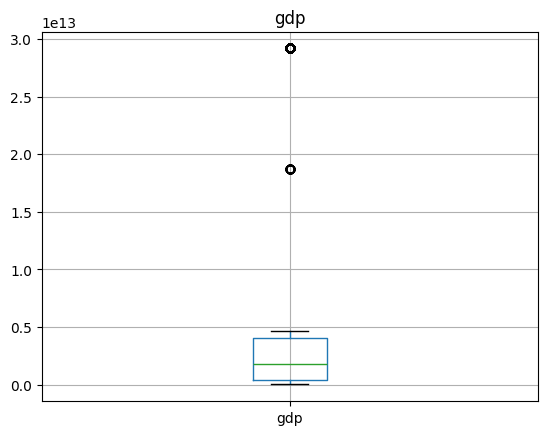

In [660]:
data.boxplot(column="gdp")
plt.title("gdp")
plt.show()

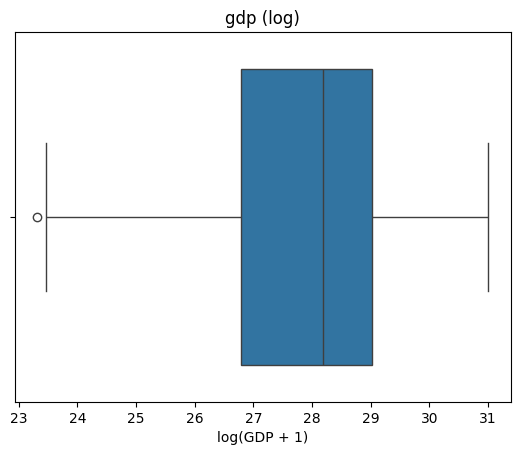

In [661]:
sns.boxplot(x=np.log1p(data["gdp"]))
plt.title("gdp (log)")
plt.xlabel("log(GDP + 1)")
plt.show()

видно, что большинство стран распределены равномерно

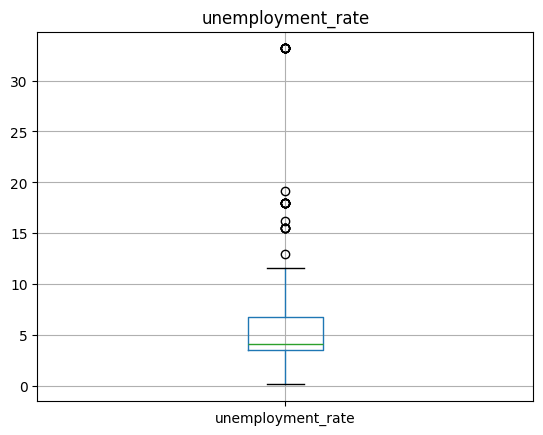

In [662]:
data.boxplot(column="unemployment_rate")
plt.title("unemployment_rate")
plt.show()

выбросы по безработице могут показать как сильно отклонение от среднего уровня бещработицы в мире сказалось на мировой рейтинг университета в этой стране

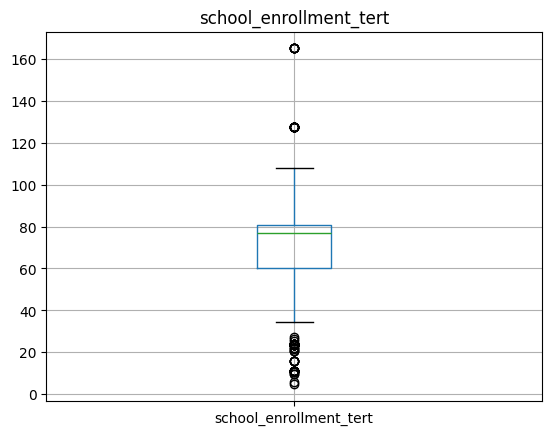

In [663]:
data.boxplot(column="school_enrollment_tert")
plt.title("school_enrollment_tert")
plt.show()

# Изучить поведение каждого признака в отдельности

Связь каждого признака с целевой переменной, а также попарные корреляции (в том числе и в особенности с таргетом). Визуализировать попарные распределения признаков и корреляции наиболее значимых.

Построить подходящие сводные таблицы и прочие диаграммы.

добавить mean значения

# Выводы

Если проведенный вами анализ позволяет сделать какие-либо выводы, постараться сформулировать их максимально глубоко и развернуто.

Упомянуть, как можно задействовать в дальнейшем приобретенные вами на этом этапе знания в решаемой задаче.